In [1]:
# project: p2
# submitter: cmbatchelor
# partner: none
# hours: 8

In [2]:
import loans
import search
import time
import pandas as pd
%load_ext autoreload
%autoreload 2

In [3]:
fhm = loans.Bank("First Home Bank")

In [4]:
#q1
fhm_avg_rate = []
for loan in fhm.loans:
    if loan.interest_rate < 0:
        continue
    fhm_avg_rate.append(loan.interest_rate)

sum(fhm_avg_rate) / len(fhm_avg_rate)

2.962962962962963

In [5]:
#q2
fhm_avg_app = []
for loan in fhm.loans:
    fhm_avg_app.append(len(loan.applicants))

sum(fhm_avg_app) / len(fhm_avg_app)

1.5777777777777777

In [6]:
#q3
age_dict = {}
for loan in fhm.loans:
    for app in loan.applicants:
        if app.age not in age_dict:
            age_dict[app.age] = 1
        else:
            age_dict[app.age] += 1
age_dict

{'65-74': 21, '45-54': 21, '>74': 5, '25-34': 4, '35-44': 13, '55-64': 7}

In [7]:
#q4
fhm_tree = search.BST()
for loan in fhm.loans:
    fhm_tree.add(loan.interest_rate, loan)
    
len(fhm_tree[-1.0])

18

In [8]:
#q5
fhm_tree.height(fhm_tree.root)

9

In [9]:
uwcu = loans.Bank("University of Wisconsin Credit Union")
uwcu_tree = search.BST()

<AxesSubplot:xlabel='BST Adds', ylabel='Total Elapsed Milliseconds'>

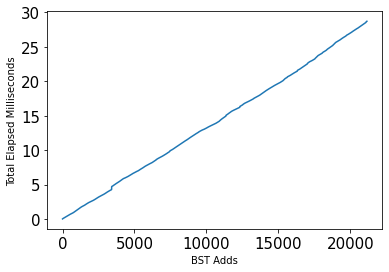

In [10]:
#q6
time_list = []
def tree_time(tree):
    t0 = time.time()
    for loan in uwcu.loans:
        tree.add(loan.interest_rate, loan)
        t1 = time.time()
   
        time_list.append((t1 - t0) * 1000)
    return time_list
    
df = pd.DataFrame(tree_time(uwcu_tree))
df.plot.line(xlabel = "BST Adds", 
             ylabel = "Total Elapsed Milliseconds",
            legend = False, fontsize = 15)

<AxesSubplot:xlabel='Lookups', ylabel='Milliseconds'>

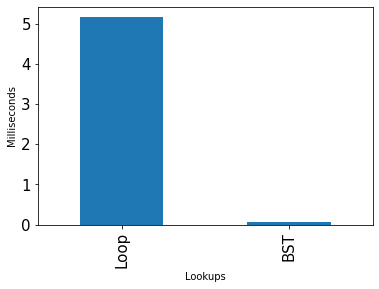

In [11]:
#q7
lookups_dict = {}
t0 = time.time()
count = 0
for loan in uwcu.loans:
    if loan.interest_rate == -1:
        count += 1
t1 = time.time()

loop = (t1-t0) * 1000
lookups_dict["Loop"] = loop



t0 = time.time()
len(uwcu_tree[-1])
t1 = time.time()

bst = (t1-t0) * 1000
lookups_dict["BST"] = bst

lookups_dict

series = pd.Series(lookups_dict)

series.plot.bar(xlabel = "Lookups",
                ylabel = "Milliseconds", fontsize = 15)

<AxesSubplot:xlabel='property value', ylabel='loan amount'>

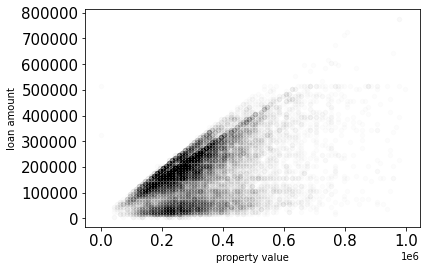

In [12]:
#q8
values = []
amounts = []
for loan in uwcu.loans:
    if loan.interest_rate == -1.0:
        continue
    if loan.property_value < 1000000.0:
        values.append(loan.property_value)
        amounts.append(loan.loan_amount)
        
value_amount = {'Value':values, 'Amount':amounts}

df = pd.DataFrame(value_amount)

df.plot.scatter(x = "Value", y = 'Amount', color = 'black',
                alpha = .01, xlabel = "property value",
                ylabel = "loan amount", fontsize = 15)

<AxesSubplot:xlabel='race', ylabel='Numer of Applicants'>

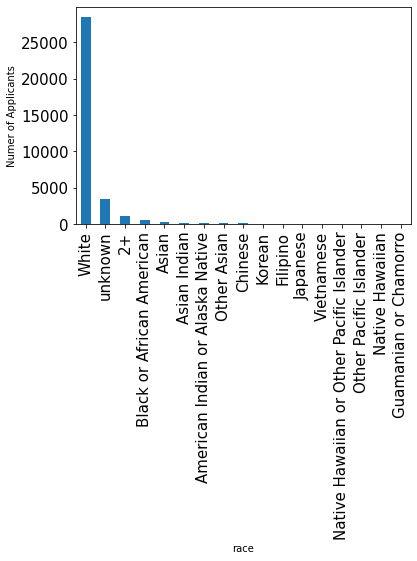

In [13]:
#q9
race_dict = {}
race_dict["2+"] = 0
race_dict["unknown"] = 0
for loan in uwcu.loans:
    for app in loan.applicants:
        #print(app.race)
        if len(app.race)  == 2:
            race_dict["2+"] += 1
        elif len(app.race) == 0:
            race_dict["unknown"] += 1
        else:
            for race in app.race:
                if race not in race_dict:
                    race_dict[race] = 1
                else:
                    race_dict[race] += 1
                
series = pd.Series(race_dict)
series.sort_values(ascending = False).plot.bar(xlabel = "race",
                ylabel = "Numer of Applicants", fontsize = 15)

In [14]:
#q10
uwcu_tree.size(uwcu_tree.root)

32